# Compressing Data via Dimensionality Reduction

## Principal Component Analysis

### Total and Explained Variance

In [1]:
import pandas as pd

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                      header=None)

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=0)

In [6]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
import numpy as np

In [8]:
cov_mat = np.cov(X_train_std.T)

In [9]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [10]:
print("\nEigenvalues \n {}".format(eigen_vals))


Eigenvalues 
 [ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


In [11]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

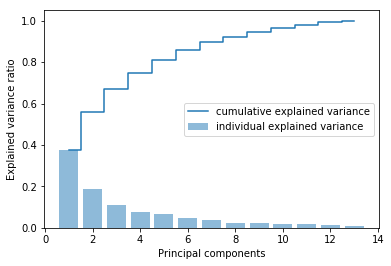

In [13]:
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
       label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

### Feature Transformation

In [14]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [15]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:, np.newaxis]))

In [16]:
print('Matrix W: {}'.format(w))

Matrix W: [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [17]:
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

In [18]:
X_train_pca = X_train_std @ w

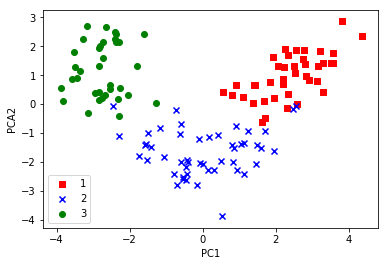

In [19]:
colors=['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0],
               X_train_pca[y_train==l,1],
               c=c, label=l, marker=m)
plt.xlabel('PC1')
plt.ylabel('PCA2')
plt.legend(loc='lower left')
plt.show()

### PCA in sklearn

In [20]:
from matplotlib.colors import ListedColormap

In [21]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
    

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)
lr = LogisticRegression()

In [24]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [25]:
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

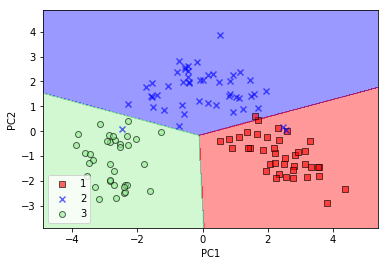

In [26]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

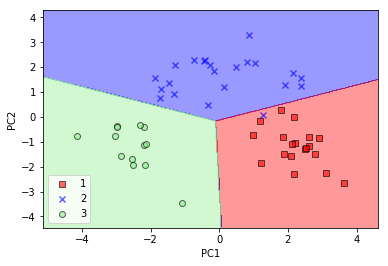

In [27]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [28]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

## Supervised data compression via linear discrimanant analysis

In [29]:
np.set_printoptions(precision=4)

In [30]:
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV {}: {}\n'.format(label,mean_vecs[label-1])) 

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [31]:
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train[y_train==label]:
        row, mv = row.reshaped(d,1), mv.reshaped(d,1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print("Within-class scatter matrix {}x{}".format(S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix 13x13


In [32]:
print("Class label distribution: {}".format(np.bincount(y_train)[1:]))

Class label distribution: [40 49 35]


## LDA via scikit-learn

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [40]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)

In [41]:
lr = LogisticRegression()
lr.fit(X_train_lda, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

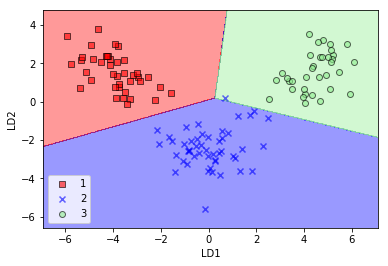

In [42]:
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.show()

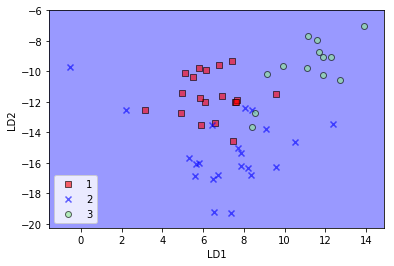

In [43]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.show()

I'm not sure what happened.
## Kernel Principal Component analysis for nonlinear mappings.

In [45]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [58]:
def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = exp(-gamma*mat_sq_dists)
    
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigvals, eigvecs = eigh(K)
    
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1, n_components + 1)))
    
    return X_pc

### Testing on half moons

In [59]:
from sklearn.datasets import make_moons

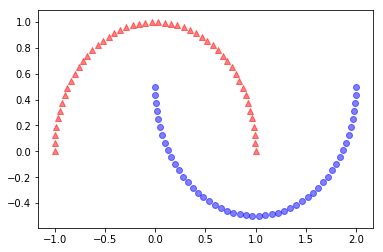

In [60]:
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0],X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0],X[y==1,1], color='blue', marker='o', alpha=0.5)
plt.show()

### Using Normal PCA

In [61]:
from sklearn.decomposition import PCA

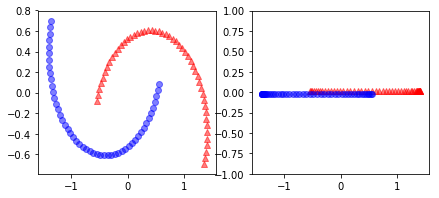

In [62]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0,0], X_spca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1,0], X_spca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1,0], np.zeros((50,1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[1].set_ylim([-1,1])
plt.show()

In [63]:
from matplotlib.ticker import FormatStrFormatter

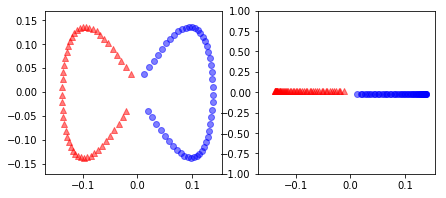

In [64]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((50,1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[1].set_ylim([-1,1])
plt.show()